In [1]:
from keras import layers
from keras import models
import os


In [2]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '../../input/cats_and_dogs_small/train'
validation_dir = '../../input/cats_and_dogs_small/validation'
train_cats_dir = os.path.join(train_dir, 'cats')


In [3]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname)
          for fname in os.listdir(train_cats_dir)]


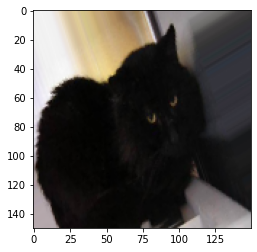

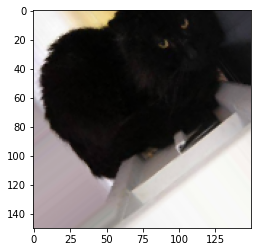

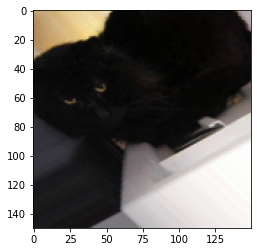

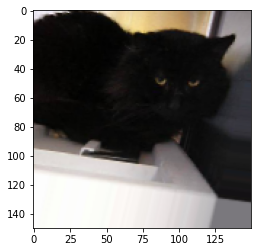

In [5]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

fnames = [os.path.join(train_cats_dir, fname)
          for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0

for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()


In [6]:
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
100/100 [==============================] - 81s 806ms/step - loss: 0.6924 - acc: 0.5122 - val_loss: 0.6969 - val_acc: 0.5140
Epoch 2/100
100/100 [==============================] - 24s 242ms/step - loss: 0.6777 - acc: 0.5698 - val_loss: 0.4162 - val_acc: 0.9613
Epoch 3/100
100/100 [==============================] - 24s 240ms/step - loss: 0.6562 - acc: 0.6058 - val_loss: 1.3098 - val_acc: 0.0939
Epoch 4/100
100/100 [==============================] - 24s 238ms/step - loss: 0.6434 - acc: 0.6199 - val_loss: 0.8093 - val_acc: 0.5528
Epoch 5/100
100/100 [==============================] - 24s 244ms/step - loss: 0.6123 - acc: 0.6567 - val_loss: 1.1503 - val_acc: 0.3509
Epoch 6/100
100/100 [==============================] - 24s 239ms/step - loss: 0.6004 - acc: 0.6657 - val_loss: 1.0744 - val_acc: 0.4298
Epoch 7/100
100/100 [==============================] - 24s 243ms/step - loss: 0.5944 - acc: 0.6802 - val_los